In [1]:
import sys
import os

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

## SIGMOID demo

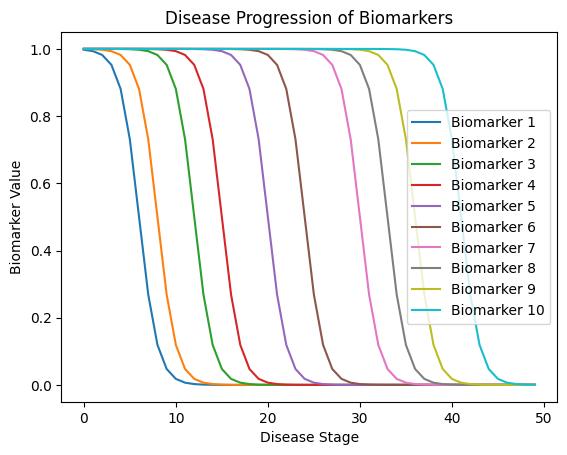

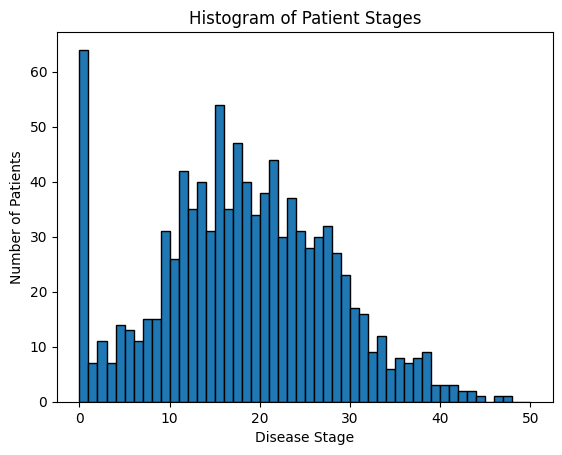

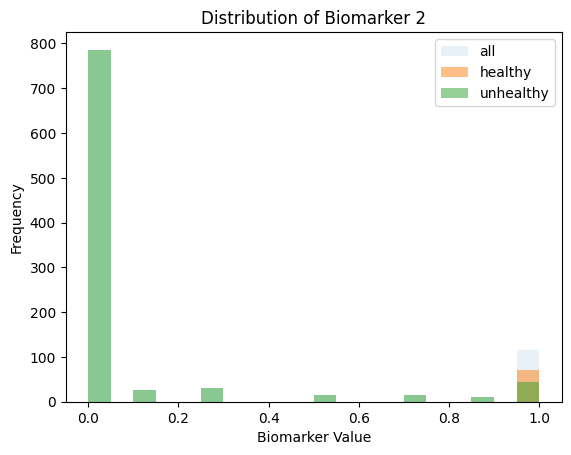

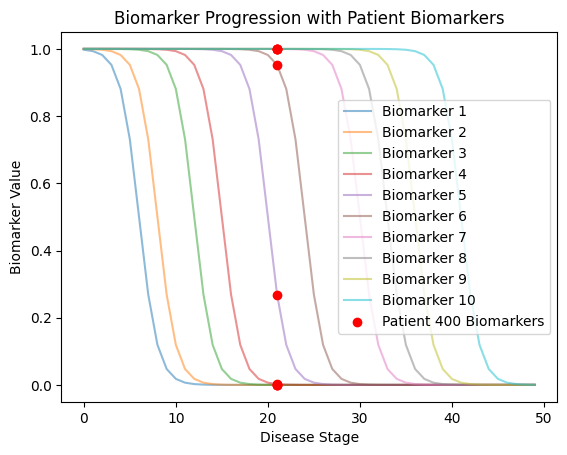

In [2]:
# model parameters
n_biomarkers = 10
n_stages = 50
model_type = 'sigmoid'
biomarkers_params_sigmoid = {
    0: {'s': 6, 'c': 1},
    1: {'s': 8, 'c': 1},
    2: {'s': 12, 'c': 1},
    3: {'s': 15, 'c': 1},
    4: {'s': 20, 'c': 1},
    5: {'s': 24, 'c': 1},
    6: {'s': 30, 'c': 1},
    7: {'s': 33, 'c': 1},
    8: {'s': 36, 'c': 1},
    9: {'s': 41, 'c': 1},
    10: {'s': 45, 'c': 1}
}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarkers, n_stages, model_type, biomarkers_params=biomarkers_params_sigmoid)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000   
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=False, noise_std=0, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plot stage histogram
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index=1, healthy_stage_threshold=1)
sample_generator.plot_patient_biomarkers(patient_index=400)

In [3]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

100%|██████████| 500000/500000 [02:20<00:00, 3568.89it/s]

Greedy Ascent Result: [4 5 6 7 8 9 1 3 2 0]
First 10 MCMC sampled orders: [array([4, 5, 6, 7, 8, 9, 0, 2, 1, 3]), array([4, 5, 6, 7, 8, 9, 3, 2, 1, 0]), array([4, 5, 6, 7, 8, 9, 3, 0, 1, 2]), array([4, 5, 6, 7, 8, 9, 0, 3, 1, 2]), array([4, 5, 6, 7, 8, 9, 0, 3, 2, 1]), array([4, 5, 6, 7, 8, 9, 3, 0, 2, 1]), array([4, 5, 6, 7, 8, 9, 3, 1, 2, 0]), array([4, 5, 6, 7, 8, 9, 0, 1, 2, 3]), array([4, 5, 6, 7, 8, 9, 0, 1, 3, 2]), array([4, 5, 6, 7, 8, 9, 0, 2, 3, 1])]
Spearman's rho values: [-0.4666666666666666, -0.5757575757575757, -0.5272727272727272, -0.49090909090909085, -0.5030303030303029, -0.5393939393939393, -0.5636363636363636, -0.4545454545454545, -0.4666666666666666, -0.49090909090909085]
Spearman's rho values: -0.4666666666666666


### TRANSITION MATRIX demo

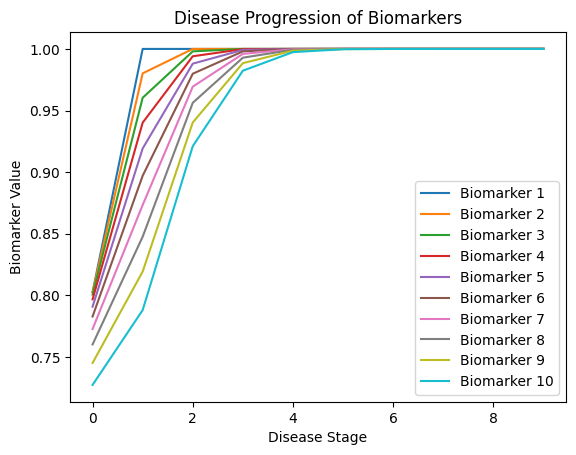

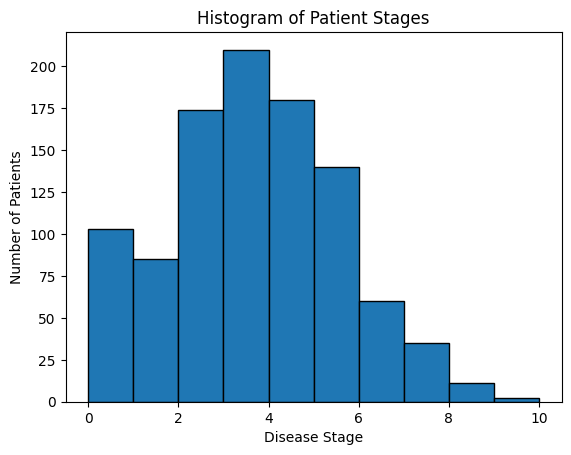

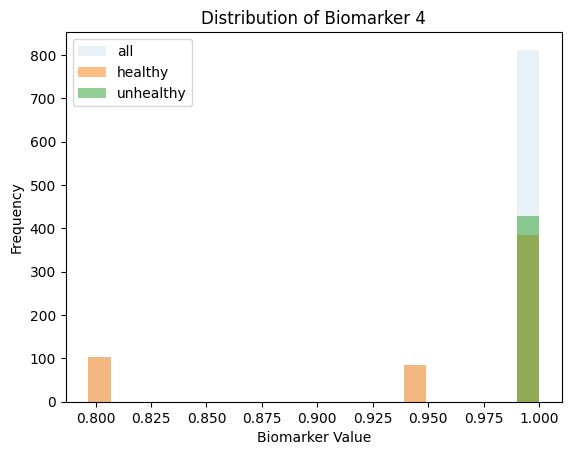

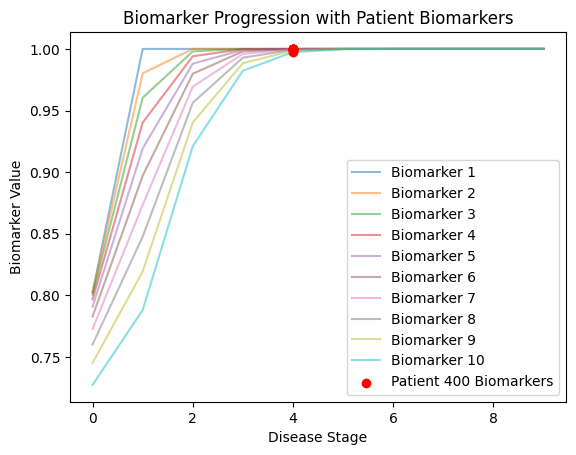

In [4]:
# specify model parameters
n_biomarkers = 10
n_stages = 10
model_type = 'transition_matrix'
biomarkers_params_transition = {'coeff': 1e-1}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarkers, n_stages, model_type, biomarkers_params=biomarkers_params_transition)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=False, noise_std=0, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plotting methods
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index = 3, healthy_stage_threshold=3)
sample_generator.plot_patient_biomarkers(patient_index=400)


In [4]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
print("Spearman's rho values:", rho)

100%|██████████| 500000/500000 [02:11<00:00, 3798.94it/s]

Greedy Ascent Result: [9 8 7 6 5 4 2 1 0 3]
First 10 MCMC sampled orders: [array([9, 8, 7, 6, 5, 4, 3, 1, 0, 2]), array([9, 8, 7, 6, 5, 4, 2, 1, 0, 3]), array([9, 8, 7, 5, 6, 4, 2, 1, 0, 3]), array([9, 8, 7, 6, 5, 4, 2, 1, 0, 3]), array([9, 8, 7, 5, 6, 4, 2, 1, 0, 3]), array([9, 8, 7, 5, 6, 4, 3, 1, 0, 2]), array([9, 8, 7, 5, 6, 4, 2, 1, 0, 3]), array([9, 8, 7, 6, 5, 4, 2, 1, 0, 3]), array([9, 8, 7, 6, 5, 4, 3, 1, 0, 2]), array([9, 8, 7, 6, 5, 4, 2, 1, 0, 3])]
Spearman's rho values: [-0.9636363636363635, -0.9272727272727272, -0.9151515151515152, -0.9272727272727272, -0.9151515151515152, -0.9515151515151514, -0.9151515151515152, -0.9272727272727272, -0.9636363636363635, -0.9272727272727272]
Spearman's rho values: -0.9636363636363635


## ODE demo

In [ ]:
# model parameters
n_biomarkers = 10
n_stages = 50
model_type = 'ode'
biomarkers_params_ode = {
    'connectivity_matrix': generate_transition_matrix(n_biomarkers, 0.1),
    'y_init': np.array([1.0] * n_biomarkers),
    't_span': (0, 50),
    'n_steps': n_stages
}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarkers, n_stages, model_type, biomarkers_params=biomarkers_params_ode)

# plot disease progression
canonical_generator.plot_disease_progression()

# generate patient samples
n_patients = 1000
sample_generator = SampleGenerator(canonical_generator, n_patients, add_noise=False, noise_std=0, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

# plotting methods
sample_generator.plot_stage_histogram()
sample_generator.plot_biomarker_distribution(biomarker_index=0, threshold=0.5)
sample_generator.plot_patient_biomarkers(patient_index=400)

In [ ]:
# run analysis
analyzer = DiseaseProgressionAnalyzer(patient_samples)
orders, rho, loglike, update_iters, probas = analyzer.run_analysis('ebm')
analyzer.print_orders(orders)